In [1]:
import numpy as np

In [2]:
def make_tier_set(low_num, med_num, hign_num, num):
    low_tier_set = list(np.random.randint(1, low_num, num))
    medium_tier_set = list(np.random.randint(low_num, med_num, num))
    hign_tier_set = list(np.random.randint(med_num, hign_num, num))
    total_tier_set = low_tier_set + medium_tier_set + hign_tier_set
    return total_tier_set

In [3]:
total_tier_set_a = make_tier_set(33, 66, 99, 100)
total_tier_set_b = make_tier_set(33, 66, 99, 100)

In [4]:
import pandas as pd

df = pd.DataFrame({'a':total_tier_set_a, 'b':total_tier_set_b})

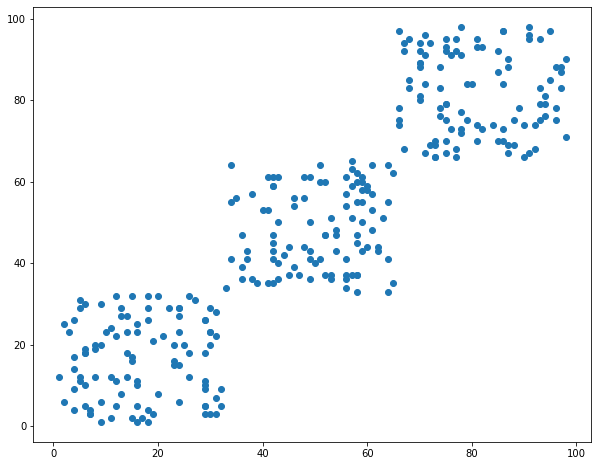

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(df['a'], df['b'])

# k-means

In [6]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=9)
cluster_pred = km.fit_predict(df)
df.loc[:,'result'] = cluster_pred

In [7]:
x = df['a']
y = df['b']
x_center = km.cluster_centers_[:,0]
y_center = km.cluster_centers_[:,1]

Text(0, 0.5, 'b')

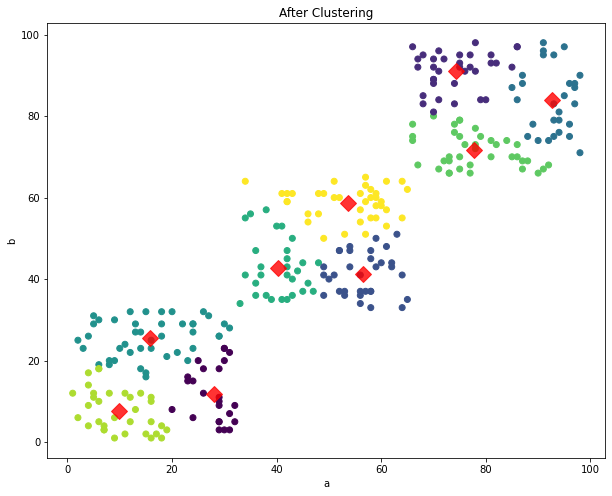

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, c=cluster_pred)
plt.plot(x_center, y_center, "rD", alpha=0.8, markersize=12, label='final_Centroid')
plt.title('After Clustering')
plt.xlabel('a')
plt.ylabel('b')

In [9]:
df['result'].value_counts()

4    43
8    38
6    38
1    34
7    33
2    33
5    29
3    28
0    24
Name: result, dtype: int64

In [15]:
km.cluster_centers_

array([[27.95833333, 11.91666667],
       [74.35294118, 91.08823529],
       [56.42424242, 41.18181818],
       [92.71428571, 83.89285714],
       [15.86046512, 25.60465116],
       [40.31034483, 42.79310345],
       [77.78947368, 71.57894737],
       [ 9.81818182,  7.6969697 ],
       [53.65789474, 58.71052632]])

In [26]:
km.predict([[65, 79]]) #[[ ~ set ~ ]]

6

In [31]:
def pick_similar_opp(feature_a, feature_b):
    cluster = km.predict([[feature_a, feature_b]])
    con = df['result'] == cluster[0]
    target_df = df.loc[con]
    target_num = len(target_df)
    picked_opp_index = np.random.randint(0, target_num, 1)
    return target_df.iloc[picked_opp_index]


In [33]:
feature_a, feature_b = list(input('능력치를 입력하시오 : ').split())
pick_similar_opp(feature_a, feature_b)

능력치를 입력하시오 :  57 89


,a,b,result
295,74,83,1
